# Breast Cancer Prediction: A Machine Learning Classification Project
### Project Description
Breast cancer is one of the most prevalent types of cancer affecting women globally. Early detection through predictive modeling is crucial to improving patient outcomes. In this project, we aim to build a machine learning model that predicts whether a breast mass is malignant (cancerous) or benign (non-cancerous) based on the characteristics of the cell nuclei present in digitized images of fine needle aspirates (FNA).

We will use a public dataset from the UCI Machine Learning Repository, which includes features extracted from the images to represent various characteristics of cell nuclei. The goal is to create a robust classifier using machine learning techniques, evaluating different algorithms like Decision Tree , Logistic Regression,SVM,Random Forest,XGBoost and fine-tuning them to maximize predictive performance.

### Tools & Libraries Used
* **Python**
* **Pandas**: For data manipulation and analysis.
* **NumPy**: For numerical computations.
* **Matplotlib and Seaborn**: For data visualization.
* **Scikit-learn**: For machine learning algorithms.
* **Jupyter Notebook**: For interactive development.

### Data Understanding & Loading
The dataset contains information about breast masses, including their ID, diagnosis (malignant or benign), and ten features computed from each cell nucleus. We load the dataset and explore its contents.

In [39]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('C:/Users/darsh/Desktop/Breast_Cancer_rawdata.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Observations:
The dataset contains 33 columns, including:
* ID: A unique identifier for each instance.
* Diagnosis: Target variable (M = malignant, B = benign).
* Radius, Texture, Perimeter, Area, etc.: Various features computed from the breast mass images.

### Data Preprocessing
* Dropping Unnecessary Columns: The ID and Unnamed olumns were dropped as they do not contribute to the analysis.
* Label Encoding: The target variable diagnosis was encoded into binary values (M=1, B=0).
* No Missing Values: We confirmed that there are no missing values in the dataset.

In [41]:
# Dropping unnecessary columns
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

# Encoding the diagnosis column (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print(df.isnull().sum())


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [43]:
# Checking the dataypes of the columns
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [45]:
# Checking the data description
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Exploratory Data Analysis (EDA)
EDA helps us understand the relationships between features and the target variable. We'll start by plotting distributions and correlations.

#### Correlation Analysis
We'll create a heatmap to visualize correlations between the features and the diagnosis.

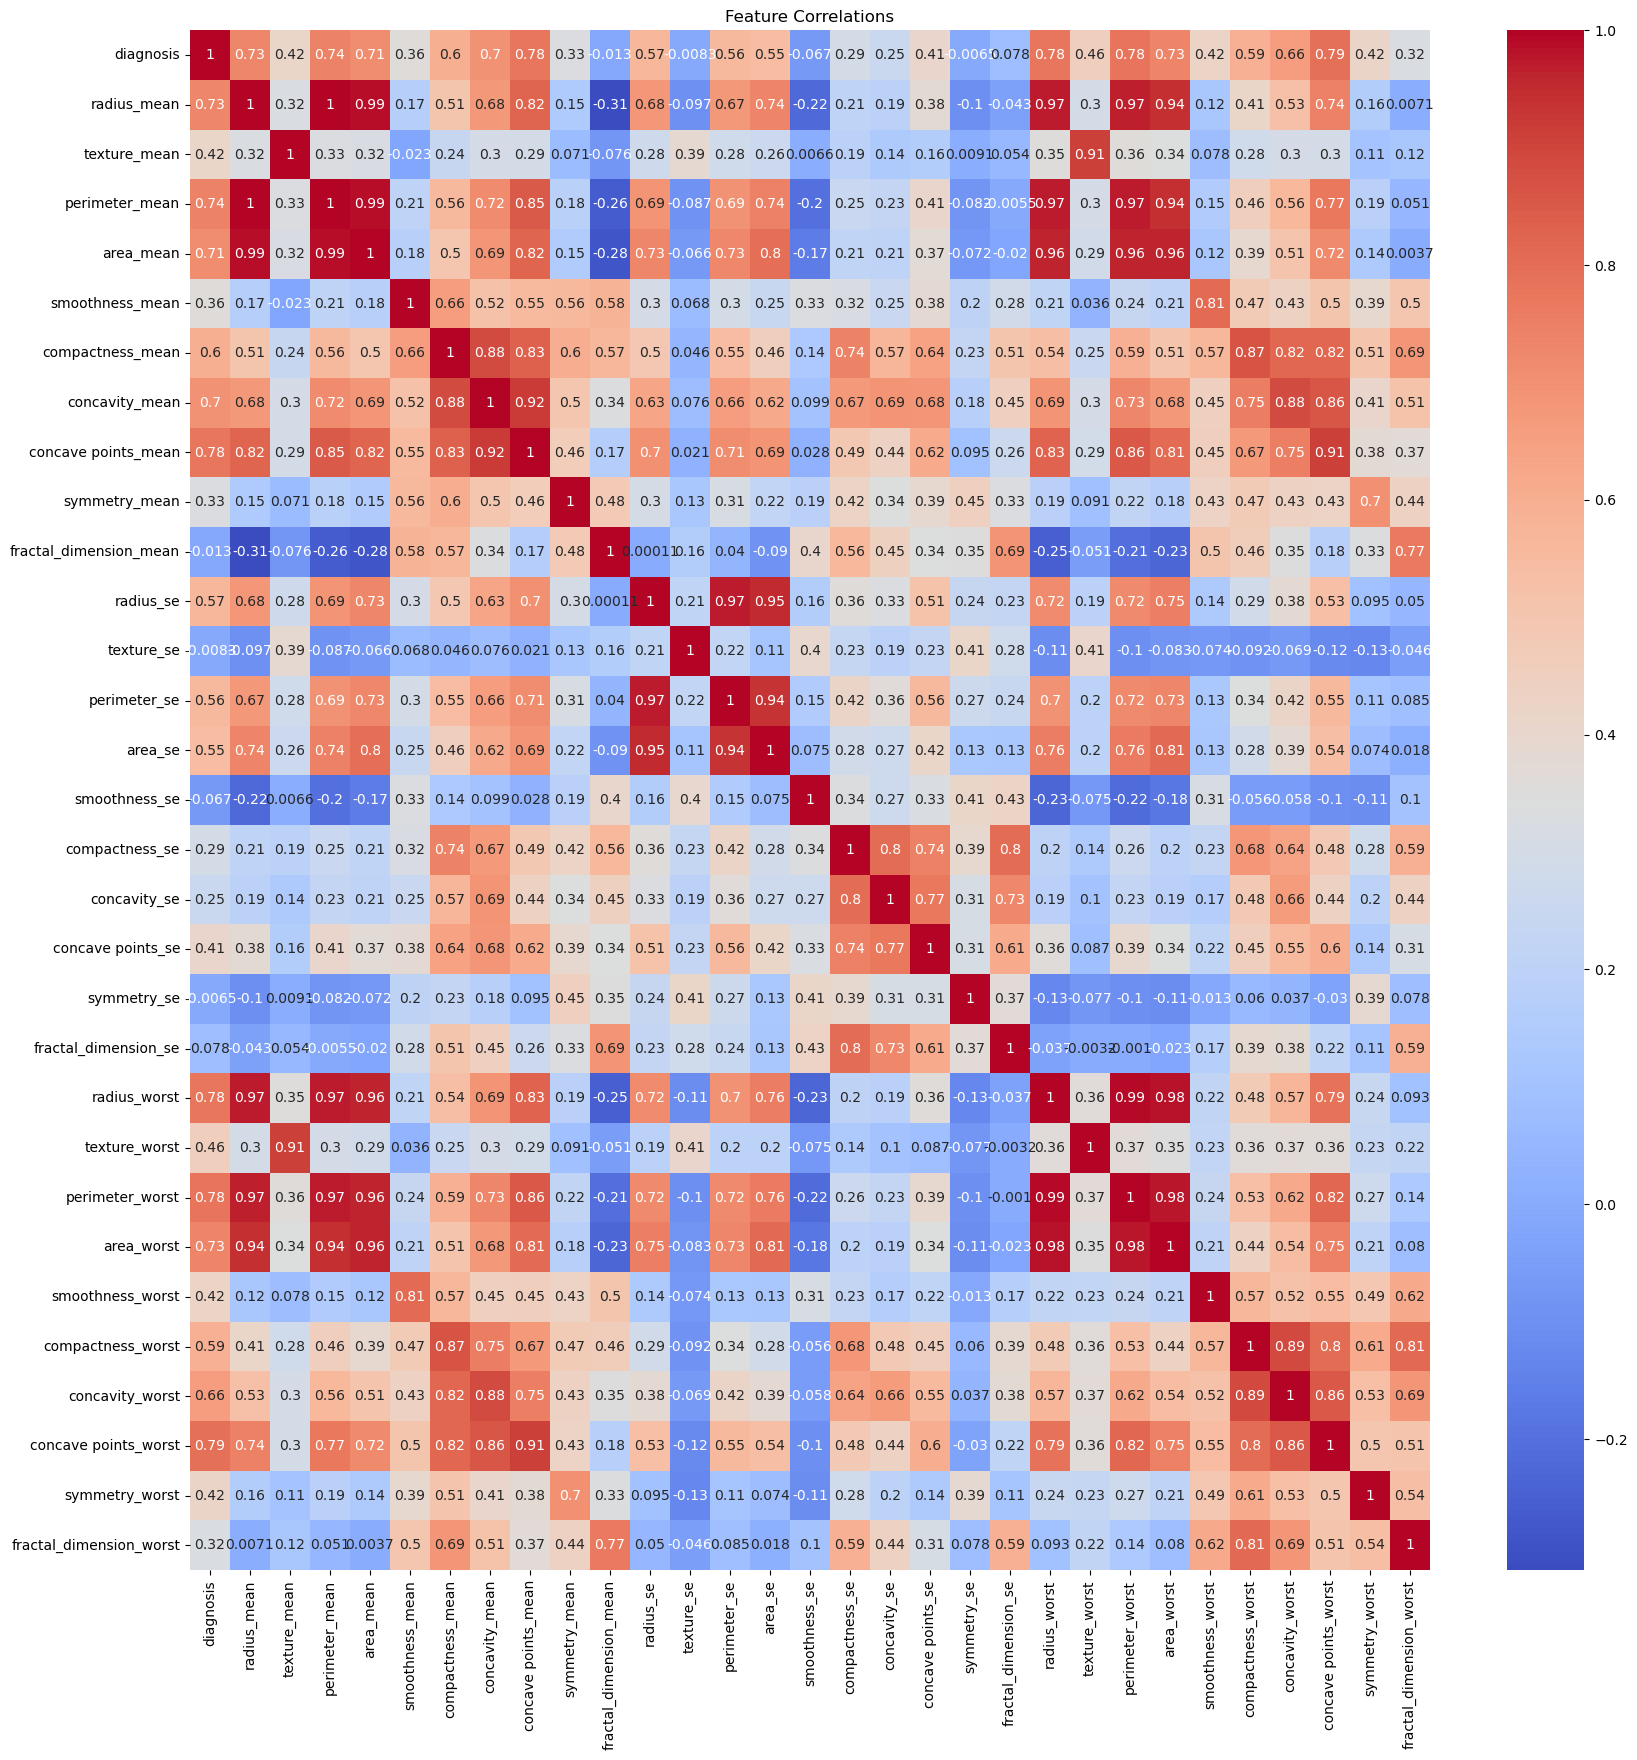

In [47]:
# Correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlations')
plt.show()


#### Observations:
* Features like radius_mean, perimeter_mean, and area_mean show a strong positive correlation with malignant diagnosis.
* Features like fractal_dimension_mean and smoothness_se have low correlation.

In [49]:
# coorelation between the column diagnosis and the other columns
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

#### Diagnosis Distribution
The diagnosis column is slightly imbalanced, with more benign cases than malignant ones

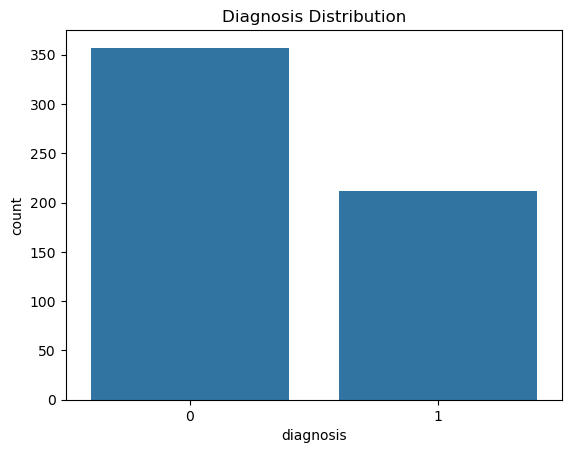

In [56]:
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.show()


### Model Development
#### Train Test Split

In [96]:
# importing the libraries
!pip install pandas scikit-learn xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [59]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Using Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predicting the diagnosis
y_pred = dtree.predict(X_test)



### Model Evaluation

In [67]:
# printing samples from predicted and actual values
print('Predicted values: ',y_pred[:10])
print('Actual values: ',y_test[:10])

Predicted values:  [0 1 1 0 0 1 1 1 0 0]
Actual values:  204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64


In [69]:
# model evaluation 
print(dtree.score(X_test,y_test))

0.935672514619883


### Using Logistic regression

In [76]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train, y_train)

y_pred_log = logmodel.predict(X_test)

### Model Evaluation

In [81]:
# printing samples from predicted and actual values
print('Predicted values: ',y_pred_log[:10])
print('Actual values: ',y_test[:10])

Predicted values:  [0 1 1 0 0 1 1 1 0 0]
Actual values:  204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64


In [128]:
# model evaluation
print(logmodel.score(X_test,y_test))

0.9766081871345029


### Using Random Forest Classifier

In [99]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

### Model Evaluation

In [101]:
# printing samples from predicted and actual values
print('Predicted values: ',rf_predictions[:10])
print('Actual values: ',y_test[:10])

Predicted values:  [0 1 1 0 0 1 1 1 1 0]
Actual values:  204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64


In [106]:
# model evaluation
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Accuracy: 0.9707602339181286


### Support Vector Machine (SVM)

In [108]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

### Model Evaluation

In [110]:
# printing samples from predicted and actual values
print('Predicted values: ',svm_predictions[:10])
print('Actual values: ',y_test[:10])

Predicted values:  [0 1 1 0 0 1 1 1 0 0]
Actual values:  204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64


In [112]:
# model evaluation
print("Accuracy:", accuracy_score(y_test, svm_predictions))

Accuracy: 0.935672514619883


### XGBoost Classifier

In [116]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

### Model Evaluation

In [118]:
# printing samples from predicted and actual values
print('Predicted values: ',svm_predictions[:10])
print('Actual values: ',y_test[:10])

Predicted values:  [0 1 1 0 0 1 1 1 0 0]
Actual values:  204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64


In [120]:
# model evaluation
print("Accuracy:", accuracy_score(y_test, xgb_predictions))

Accuracy: 0.9707602339181286


### Accuracy Scores
* **Decision Tree Classifier** achieved an accuracy of approximately **93.5%**.
* **Logistic Regression** achieved a slightly better accuracy of **97.66%**.
* **Random Forest Classifier** achieved a good accuracy of **97%**.
* **XGBoost Classifier** has also achieved a good accuracy of **97%**.
* **Support Vector Machine** achieved a slightly better accuracy of **93.5%**.

### Conclution
In this project, we evaluated multiple machine learning classifiers to predict breast cancer diagnosis based on various features derived from fine needle aspirate (FNA) images. The accuracy scores of the models are as follows:

* **The Decision Tree Classifier** achieved an accuracy of approximately **93.5%**, demonstrating its ability to classify the data effectively.
* **Logistic Regression** provided the highest accuracy at **97.66%**, indicating that this model is particularly well-suited for this binary classification task.
* **The Random Forest Classifier** also performed admirably with an accuracy of **97%**, benefiting from its ensemble learning approach, which reduces overfitting and improves generalization.
* **XGBoost Classifier** achieved a commendable accuracy of **97%**, leveraging its advanced boosting techniques to enhance prediction performance.
* **Support Vector Machine** exhibited an accuracy of **93.5%**, matching the Decision Tree Classifier, yet falling short compared to the top-performing models.

Overall, both **Logistic Regression** and ensemble methods like **Random Forest** and **XGBoost** have demonstrated superior predictive capabilities for this dataset. These results emphasize the importance of model selection in achieving high accuracy in medical diagnosis tasks, highlighting the potential for machine learning to assist healthcare professionals in the early detection of breast cancer.